In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# importing dataset 
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\student_scores_dataset.csv")
df

,StudyHours,SleepHours,Attendance,Score
0,20.019882,-6.5,84.57,95.9
1,4.720000,5.2,76.58,18.8
2,6.300000,6.8,94.54,47.8
3,8.050000,9.3,96.92,15.4
4,4.530000,6.1,78.63,27.8
...,...,...,...,...
245,4.330000,9.1,78.69,33.2
246,4.050000,5.8,71.88,10.2
247,3.690000,8.0,94.11,19.1
248,8.530000,7.7,88.62,68.1


In [68]:
df.isnull().sum()

StudyHours    10
SleepHours     0
Attendance     8
Score          0
dtype: int64

In [6]:
df=df.dropna(subset="StudyHours")
df=df.dropna(subset="Attendance")

In [7]:
df.isnull().sum()

StudyHours    0
SleepHours    0
Attendance    0
Score         0
dtype: int64

In [8]:
df=df.abs()

In [9]:
df

,StudyHours,SleepHours,Attendance,Score
0,20.019882,6.5,84.57,95.9
1,4.720000,5.2,76.58,18.8
2,6.300000,6.8,94.54,47.8
3,8.050000,9.3,96.92,15.4
4,4.530000,6.1,78.63,27.8
...,...,...,...,...
245,4.330000,9.1,78.69,33.2
246,4.050000,5.8,71.88,10.2
247,3.690000,8.0,94.11,19.1
248,8.530000,7.7,88.62,68.1


In [10]:
df.sort_values(by="Score", ascending=False)

,StudyHours,SleepHours,Attendance,Score
200,21.146150,6.3,84.61,100.0
50,25.833243,8.8,81.06,100.0
125,23.169335,7.0,70.66,96.3
0,20.019882,6.5,84.57,95.9
75,17.162196,6.3,63.48,89.3
...,...,...,...,...
155,3.570000,7.3,93.86,0.0
37,1.080000,7.1,71.76,0.0
14,1.550000,8.4,72.46,0.0
74,0.240000,7.1,72.96,0.0


In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['StudyHours', 'SleepHours', 'Attendance', 'Score'], dtype='object')

In [13]:
#concerting it into data frame
df=pd.DataFrame(df)

In [14]:
#rounding off vaues up to two
df["StudyHours"]=df["StudyHours"].round(2)

In [15]:
df

,StudyHours,SleepHours,Attendance,Score
0,20.02,6.5,84.57,95.9
1,4.72,5.2,76.58,18.8
2,6.30,6.8,94.54,47.8
3,8.05,9.3,96.92,15.4
4,4.53,6.1,78.63,27.8
...,...,...,...,...
245,4.33,9.1,78.69,33.2
246,4.05,5.8,71.88,10.2
247,3.69,8.0,94.11,19.1
248,8.53,7.7,88.62,68.1


<Axes: title={'center': 'score according study hours'}, xlabel='StudyHours', ylabel='Score'>

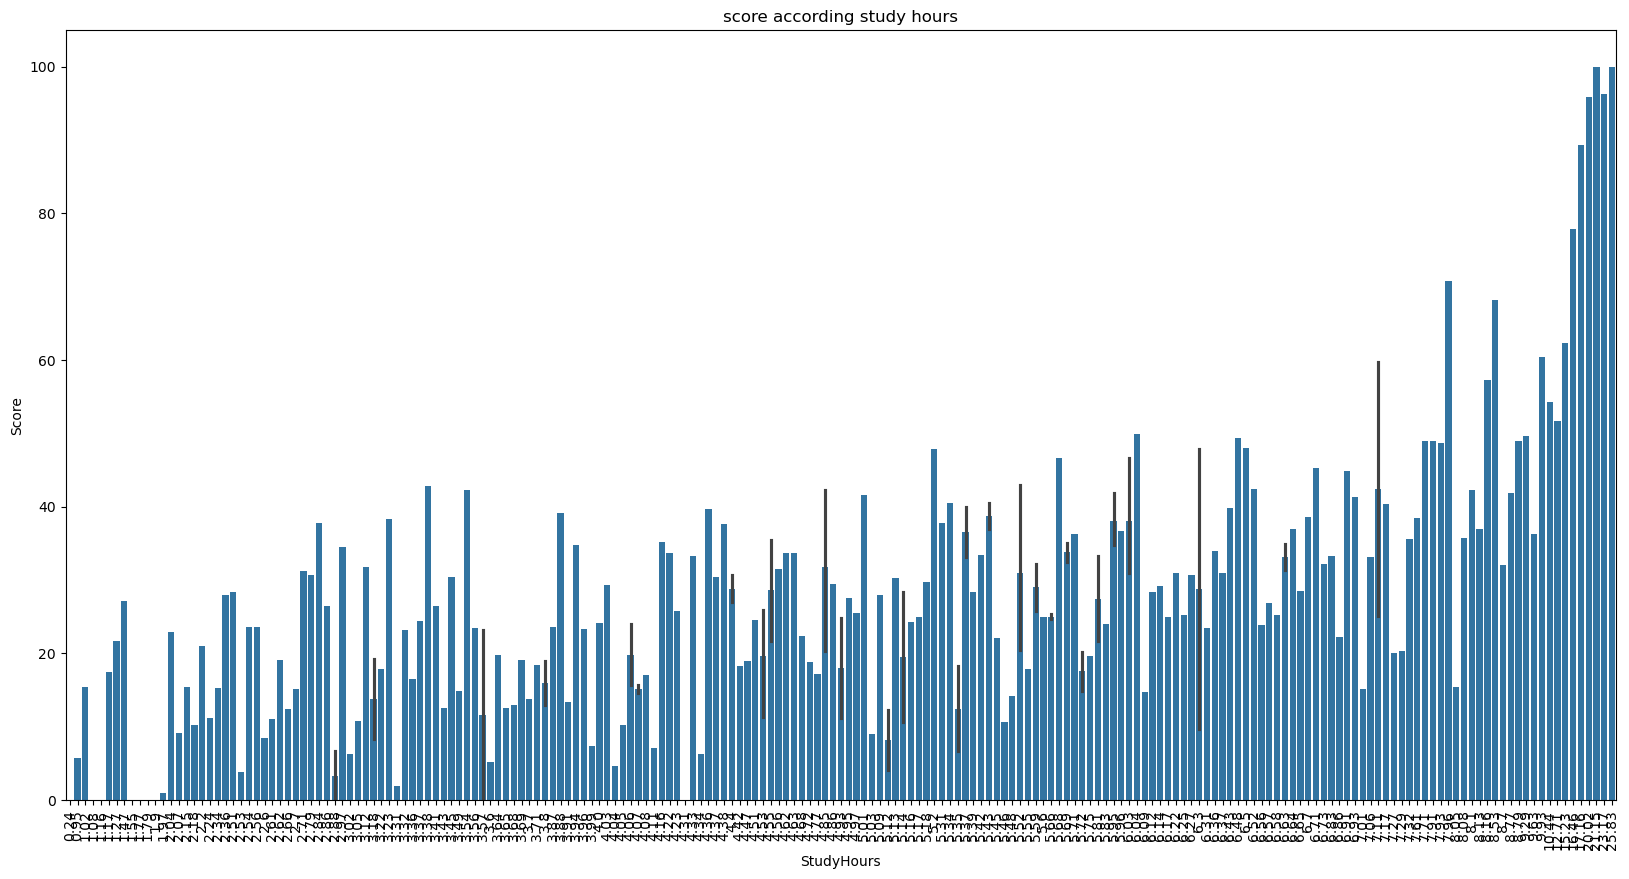

In [16]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("score according study hours")
sb.barplot(x="StudyHours",y="Score", data=df)


In [17]:
df=df[df["StudyHours"]<=20]

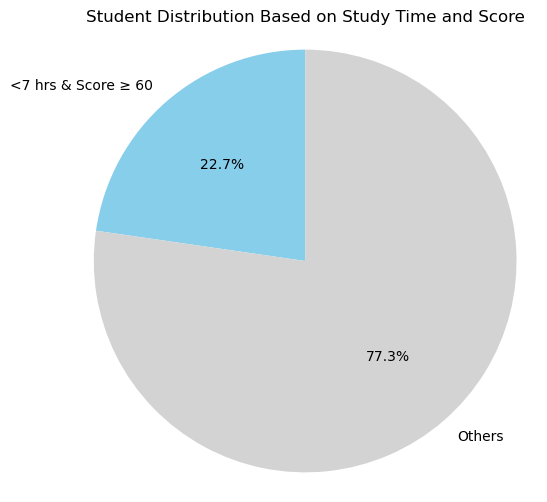

In [18]:
students_good_performance = df[(df['StudyHours'] < 7) & (df['Score'] >= 30)]
other_students = df[~((df['StudyHours'] < 7) & (df['Score'] >= 60))]

group_counts = [len(students_good_performance), len(other_students)]
group_labels = ['<7 hrs & Score ≥ 60', 'Others']


plt.figure(figsize=(6, 6))
plt.pie(group_counts, labels=group_labels, autopct='%1.1f%%', startangle=90,
        colors=['skyblue', 'lightgray'])

plt.title('Student Distribution Based on Study Time and Score')
plt.axis('equal')  # This makes sure the pie is drawn as a circle
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X=df[["StudyHours","Attendance","SleepHours"]]
Y=df["Score"]

model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [21]:
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (coefficient): 4.554866055783685
Intercept: 4.5893407084068585


In [22]:
def Score_predict(inputs):
    inputs = np.array(inputs)

    if (inputs[:, 0] > 20).any():
        print("Capping Study Hours to max 20.")
        inputs[:, 0] = np.clip(inputs[:, 0], 0, 20)

    input_df = pd.DataFrame(inputs, columns=["StudyHours", "Attendance", "SleepHours"])

    predictions = model.predict(input_df)
    return inputs[:, 0], np.clip(predictions, 0, 100)

In [24]:
INPUT = [[5, 55, 6], [18, 50, 7], [25, 60, 5]]  
capped_hours, predicted_scores = Score_predict(INPUT)

for i in range(len(INPUT)):
    print("Study Hours (Capped):", capped_hours[i], "→ Predicted Score:", round(predicted_scores[i], 2))
    

Capping Study Hours to max 20.
Study Hours (Capped): 5 → Predicted Score: 26.6
Study Hours (Capped): 18 → Predicted Score: 85.7
Study Hours (Capped): 20 → Predicted Score: 95.05


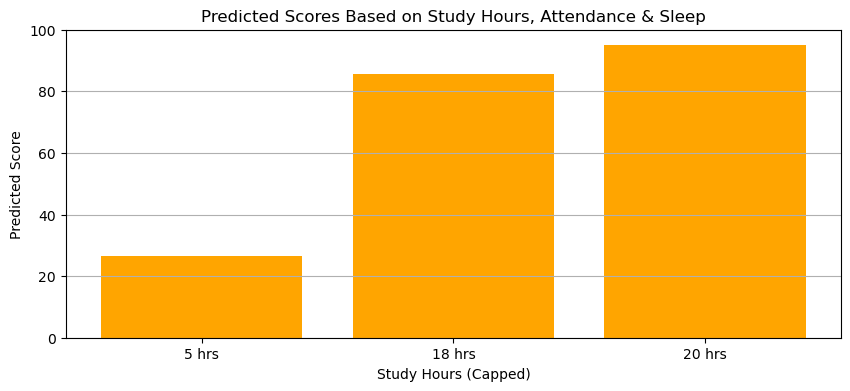

In [29]:
# Visualization
plt.figure(figsize=(10, 4))
plt.bar(range(len(INPUT)), predicted_scores, color='orange', tick_label=[f"{int(h)} hrs" for h in capped_hours])
plt.xlabel("Study Hours (Capped)")
plt.ylabel("Predicted Score")
plt.title("Predicted Scores Based on Study Hours, Attendance & Sleep")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

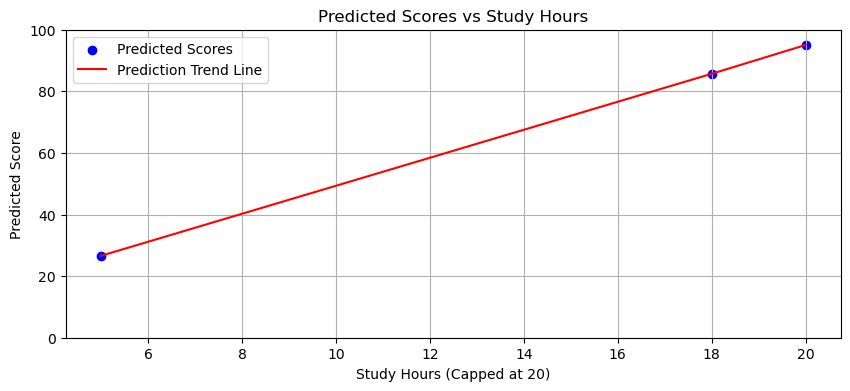

In [30]:
# Sort for plotting
sorted_indices = np.argsort(capped_hours)
sorted_hours = capped_hours[sorted_indices]
sorted_scores = predicted_scores[sorted_indices]

# Plotting
plt.figure(figsize=(10, 4))
plt.scatter(capped_hours, predicted_scores, color='blue', label='Predicted Scores')  # Scatter points
plt.plot(sorted_hours, sorted_scores, color='red', label='Prediction Trend Line')    # Line connecting points
plt.xlabel("Study Hours (Capped at 20)")
plt.ylabel("Predicted Score")
plt.title("Predicted Scores vs Study Hours")
plt.grid(True)
plt.legend()
plt.ylim(0, 100)
plt.show()